# Computational Physics PHYS-E0412 - Homework 4
Ari Viitala 
432568

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
%matplotlib inline

In [131]:
iterations = 200
N = 20
lat = np.random.randint(0, 2, (N, N)) * 2 - 1
p = 0
J = np.ones((N,N))
sng = np.ones((N,N))

for i in range(0, N):
    for j in range(0, N):
        if np.random.rand() < p:
            J[i, j] = -1

sng[::2, ::2] = -1
sng[1::2, 1::2] = -1

T = np.linspace(3, 1, iterations)

In [132]:
def H(i, j):
    u = j - 1 if j - 1 >= 0 else N - 1
    d = j + 1 if j + 1 < N else 0
    l = i - 1 if i - 1 >= 0 else N - 1
    r = i + 1 if i + 1 < N else  0

    e = lat[i, u] * J[i, u] + lat[r, j] * J[r, j] + lat[i, d] * J[i, d] + lat[l, j] * J[l, j] 

    return 2 * lat[i, j] * e

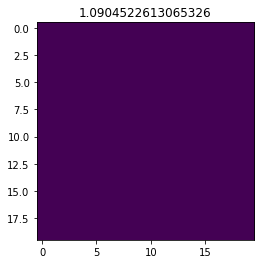

In [133]:
lat = np.random.randint(0, 2, (N, N)) * 2 - 1
m = [] 
ms = []
e = []
es = []
fig = plt.figure()
ax = fig.gca()
plt.show()
for k in range(0, iterations):
    if k % 10 == 0:
        clear_output(wait = True)
        #print(k)
        ax.imshow(lat)
        ax.set_title(T[k])
        fig.canvas.draw()
        fig.canvas.flush_events()
        display(fig)

    for i in range(0, N):
        for j in range(0, N):
            energy = H(i, j)
            e.append(energy)
            lat[i, j] *= -1
            de = H(i, j) - energy
            if np.random.random() > np.exp(de / T[k]):
                lat[i, j] *= -1
    es.append(np.mean(e))
    e = []
    m.append(1 / N**2 * abs(np.sum(lat)))
    ms.append(1 / N**2 * abs(np.sum(lat * sng)))
    

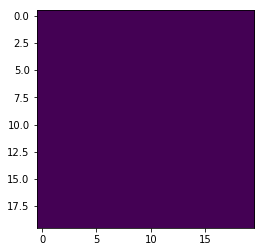

In [134]:
plt.imshow(J)

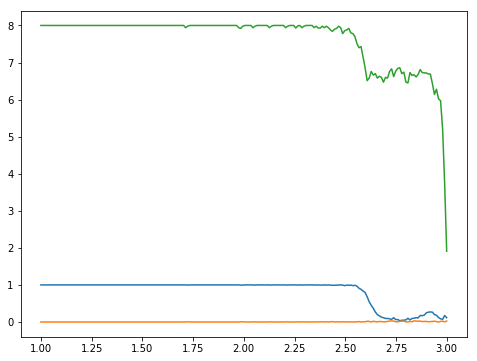

In [135]:
plt.figure(1, (8, 6))
plt.plot(T,m)
plt.plot(T, ms)
plt.plot(T,es)
plt.show()

In [136]:
def H2(i, j, J, lat):
    u = j - 1 if j - 1 >= 0 else N - 1
    d = j + 1 if j + 1 < N else 0
    l = i - 1 if i - 1 >= 0 else N - 1
    r = i + 1 if i + 1 < N else  0

    e = lat[i, u] * J[i, u] + lat[r, j] * J[r, j] + lat[i, d] * J[i, d] + lat[l, j] * J[l, j] 

    return 2* lat[i, j] * e

In [137]:
def anneal(p, N, iters, Th, Tl):
    lat = np.ones((N,N))
    J = np.ones((N,N))
    sng = np.ones((N,N))

    for i in range(0, N):
        for j in range(0, N):
            if np.random.rand() < p:
                J[i, j] = -1

    sng[::2, ::2] = -1
    sng[1::2, 1::2] = -1

    T = np.linspace(Th, Tl, iters)
    
    lat = np.random.randint(0, 2, (N, N)) * 2 - 1
    m = np.zeros(iters) 
    ms = np.zeros(iters)
    for k in range(0, iters):
        #clear_output(wait = True)
        #print(k)

        for i in range(0, N):
            for j in range(0, N):
                energy = H2(i, j, J, lat)
                de = -2 * energy
                if np.random.random() < np.exp(de / T[k]):
                    lat[i, j] *= -1
        m[k] = (1 / N**2 * abs(np.sum(lat)))
        ms[k] = (1 / N**2 * abs(np.sum(lat * sng)))
        
    return m, ms, lat

In [138]:
m, ms, lat = anneal(1, 50, 200, 5, 0.1)

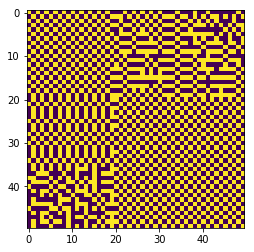

In [139]:
plt.imshow(lat)

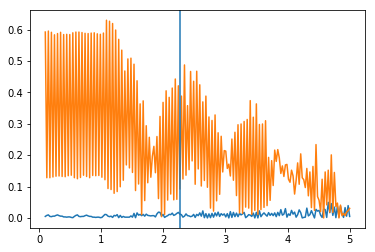

In [141]:
T = np.linspace(5, 0.1, 200)
plt.plot(T,m)
plt.plot(T,ms)
plt.axvline(2.27)

19
P: [0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068966 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206897 0.89655172 0.93103448 0.96551724]
Magnetization: [[0.9725  0.91425 0.74775 0.775   0.47725 0.282   0.14475 0.08175 0.062
  0.043   0.04    0.04325 0.02675 0.0295  0.0245  0.03    0.0385  0.0375
  0.03125 0.038   0.0315  0.0315  0.0375  0.02375 0.0245  0.02425 0.016
  0.01325 0.0025 ]]
Swagger: [[0.      0.00525 0.01225 0.016   0.01925 0.0175  0.02425 0.03375 0.041
  0.047   0.027   0.02725 0.02975 0.0185  0.0345  0.027   0.0215  0.03
  0.03475 0.0395  0.032   0.086   0.098   0.17475 0.249   0.40775 0.571
  0.72075 0.851  ]]


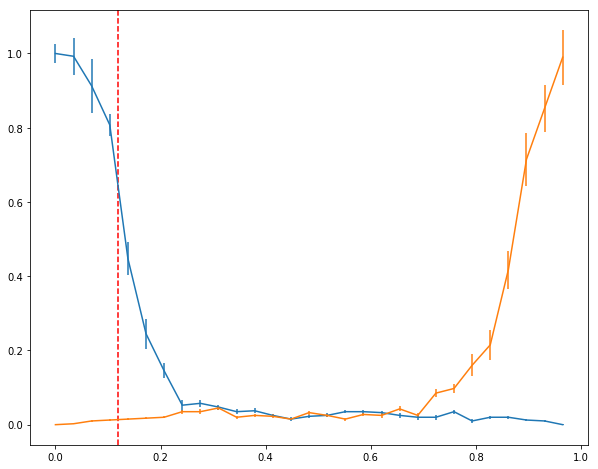

In [180]:
n_p = 30
p_iters = 20
N = 20
iters = 200
Th = 3
Tl = 1

ps = np.linspace(0,1, n_p)
m = np.zeros((iters, n_p, p_iters))
ms = np.zeros((iters, n_p, p_iters))
for i in range(0, n_p):
    for k in range(0, p_iters):
        clear_output(wait = True)    
        print(k)
        print("P: "  + str(ps[:i]))
        print("Magnetization: " + str(np.mean(m[-1:,:i,:], axis = 2)))
        print("Swagger: " + str(np.mean(ms[-1:,:i,:], axis = 2)))
        
        plt.figure(1, (10, 8))
        plt.errorbar(ps[:i], np.median(m[-1,:i,:], axis = 1), m[-1,:i,:].std(axis = 1) / np.sqrt(p_iters))
        plt.errorbar(ps[:i], np.median(ms[-1,:i,:], axis = 1), ms[-1,:i,:].std(axis = 1) / np.sqrt(p_iters))
        plt.axvline(0.12, color = "red", linestyle = "--")
        plt.show()
        temp_m, temp_ms, lat = anneal(ps[i], N, iters, Th, Tl)
        m[:, i, k] = temp_m
        ms[:, i, k] = temp_ms
   

    

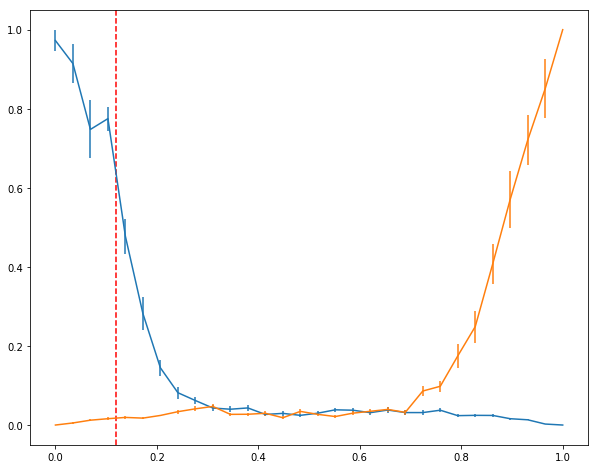

In [184]:
plt.figure(1, (10, 8)) 

plt.errorbar(ps, m[-1,:,:].mean(axis = 1), m[-1,:,:].std(axis = 1) / np.sqrt(p_iters ))
plt.errorbar(ps, ms[-1,:,:].mean(axis = 1), ms[-1,:,:].std(axis = 1) / np.sqrt(p_iters ))

plt.axvline(0.12, color = "red", linestyle = "--")

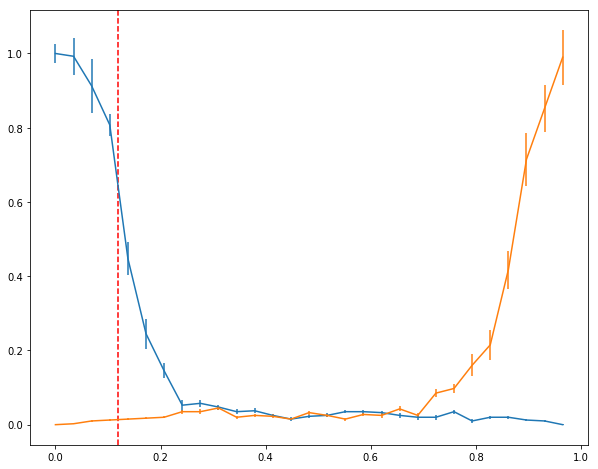

In [185]:
plt.figure(1, (10, 8))
plt.errorbar(ps[:i], np.median(m[-1,:i,:], axis = 1), m[-1,:i,:].std(axis = 1) / np.sqrt(p_iters))
plt.errorbar(ps[:i], np.median(ms[-1,:i,:], axis = 1), ms[-1,:i,:].std(axis = 1) / np.sqrt(p_iters))
plt.axvline(0.12, color = "red", linestyle = "--")
plt.show()
        

<ErrorbarContainer object of 3 artists>

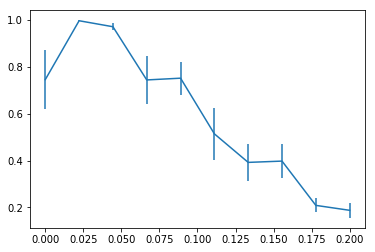

In [172]:
plt.errorbar(ps, m[-1,:,:].mean(axis = 1), m[-1,:,:].std(axis = 1) / np.sqrt(p_iters ))

In [165]:
m[-1,:,:].std(axis = 1)

array([0.39254586, 0.0067082 , 0.04429729, 0.3247014 , 0.22362301,
       0.34905623, 0.25139809, 0.22781846, 0.09433451, 0.10235233])

In [181]:
ps[-1]

1.0